## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_results_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')

# Display the data table for preview
combined_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
combined_results_df["Mouse ID"].unique()
mouse_count = len(combined_results_df["Mouse ID"].unique())
mouse_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df = combined_results_df[combined_results_df.duplicated(["Mouse ID", "Timepoint"])]
duplicates_df.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0


In [5]:
#Set index for main_df
combined_results_df_index = combined_results_df.set_index("Mouse ID")
combined_results_df_index.head()


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_results_df_index.loc["g989",]
data_for_dup = combined_results_df_index.loc["g989",]
data_for_dup

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_results_df_index.drop("g989")
clean_df.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


In [17]:
#Reset index for clean df
clean_df.reset_index(inplace = True)

In [18]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].unique()
new_mouse_count = len(clean_df["Mouse ID"].unique())
new_mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [22]:
#Create a dataframe for summary
df_summary = clean_df
df_summary.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [32]:
#Create groupby datafram on Drug Regimen
df_by_reg = clean_df
df_by_reg.count().head(10)

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [ ]:
#Define tumor volume values

In [35]:
tumor_vol_by_reg_index = df_by_reg.set_index("Drug Regimen")
tumor_vol_by_reg_index.head()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,k403,Male,21,16,0,45.000000,0
Ramicane,k403,Male,21,16,5,38.825898,0
Ramicane,k403,Male,21,16,10,35.014271,1
Ramicane,k403,Male,21,16,15,34.223992,1
Ramicane,k403,Male,21,16,20,32.997729,1


In [38]:
#Get list for tumor volume
tum_vol_list = tumor_vol_by_reg_index["Tumor Volume (mm3)"]
tum_vol_list

Drug Regimen
Ramicane    45.000000
Ramicane    38.825898
Ramicane    35.014271
Ramicane    34.223992
Ramicane    32.997729
              ...    
Naftisol    63.145652
Naftisol    65.841013
Naftisol    69.176246
Naftisol    70.314904
Naftisol    73.867845
Name: Tumor Volume (mm3), Length: 1880, dtype: float64

In [45]:
all_regimens = clean_df["Drug Regimen"]
all_regimens = clean_df["Drug Regimen"].unique()
all_regimens

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [65]:
#Get Average
tumor_vol_avg =[]
for val in all_regimens:
    avg_temp_df = clean_df[clean_df["Drug Regimen"]==val][["Drug Regimen", "Tumor Volume (mm3)"]]
    tumor_vol_avg.append(avg_temp_df.mean())
tumor_vol_avg

[Tumor Volume (mm3)    40.216745
 dtype: float64,
 Tumor Volume (mm3)    40.675741
 dtype: float64,
 Tumor Volume (mm3)    52.884795
 dtype: float64,
 Tumor Volume (mm3)    54.033581
 dtype: float64,
 Tumor Volume (mm3)    52.591172
 dtype: float64,
 Tumor Volume (mm3)    54.233149
 dtype: float64,
 Tumor Volume (mm3)    53.236507
 dtype: float64,
 Tumor Volume (mm3)    55.235638
 dtype: float64,
 Tumor Volume (mm3)    52.32093
 dtype: float64,
 Tumor Volume (mm3)    54.331565
 dtype: float64]

In [111]:
#Average
avg_vol_by_reg = pd.DataFrame(tumor_vol_avg, index=all_regimens)
avg_vol_by_reg

,Tumor Volume (mm3)
Ramicane,40.216745
Capomulin,40.675741
Infubinol,52.884795
Placebo,54.033581
Ceftamin,52.591172
Stelasyn,54.233149
Zoniferol,53.236507
Ketapril,55.235638
Propriva,52.320930
Naftisol,54.331565


In [73]:
#Get Median
tumor_vol_median =[]
for val in all_regimens:
    median_temp_df = clean_df[clean_df["Drug Regimen"]==val][["Drug Regimen", "Tumor Volume (mm3)"]]
    tumor_vol_median.append(median_temp_df.median())
tumor_vol_median

[Tumor Volume (mm3)    40.673236
 dtype: float64,
 Tumor Volume (mm3)    41.557809
 dtype: float64,
 Tumor Volume (mm3)    51.820584
 dtype: float64,
 Tumor Volume (mm3)    52.288934
 dtype: float64,
 Tumor Volume (mm3)    51.776157
 dtype: float64,
 Tumor Volume (mm3)    52.431737
 dtype: float64,
 Tumor Volume (mm3)    51.818479
 dtype: float64,
 Tumor Volume (mm3)    53.698743
 dtype: float64,
 Tumor Volume (mm3)    50.446266
 dtype: float64,
 Tumor Volume (mm3)    52.509285
 dtype: float64]

In [74]:
#Median
median_vol_by_reg = pd.DataFrame(tumor_vol_median, index=all_regimens)
median_vol_by_reg

,Tumor Volume (mm3)
Ramicane,40.673236
Capomulin,41.557809
Infubinol,51.820584
Placebo,52.288934
Ceftamin,51.776157
Stelasyn,52.431737
Zoniferol,51.818479
Ketapril,53.698743
Propriva,50.446266
Naftisol,52.509285


In [76]:
#Get Variance
tumor_vol_var =[]
for val in all_regimens:
    var_temp_df = clean_df[clean_df["Drug Regimen"]==val][["Drug Regimen", "Tumor Volume (mm3)"]]
    tumor_vol_var.append(var_temp_df.var())
tumor_vol_var

[Tumor Volume (mm3)    23.486704
 dtype: float64,
 Tumor Volume (mm3)    24.947764
 dtype: float64,
 Tumor Volume (mm3)    43.128684
 dtype: float64,
 Tumor Volume (mm3)    61.168083
 dtype: float64,
 Tumor Volume (mm3)    39.290177
 dtype: float64,
 Tumor Volume (mm3)    59.450562
 dtype: float64,
 Tumor Volume (mm3)    48.533355
 dtype: float64,
 Tumor Volume (mm3)    68.553577
 dtype: float64,
 Tumor Volume (mm3)    43.852013
 dtype: float64,
 Tumor Volume (mm3)    66.173479
 dtype: float64]

In [81]:
#Variance
var_vol_by_reg = pd.DataFrame(tumor_vol_var, index=all_regimens)
var_vol_by_reg

,Tumor Volume (mm3)
Ramicane,23.486704
Capomulin,24.947764
Infubinol,43.128684
Placebo,61.168083
Ceftamin,39.290177
Stelasyn,59.450562
Zoniferol,48.533355
Ketapril,68.553577
Propriva,43.852013
Naftisol,66.173479


In [83]:
#Get Standard Deviation
tumor_vol_std =[]
for val in all_regimens:
    std_temp_df = clean_df[clean_df["Drug Regimen"]==val][["Drug Regimen", "Tumor Volume (mm3)"]]
    tumor_vol_std.append(std_temp_df.std())
tumor_vol_std

[Tumor Volume (mm3)    4.846308
 dtype: float64,
 Tumor Volume (mm3)    4.994774
 dtype: float64,
 Tumor Volume (mm3)    6.567243
 dtype: float64,
 Tumor Volume (mm3)    7.821003
 dtype: float64,
 Tumor Volume (mm3)    6.268188
 dtype: float64,
 Tumor Volume (mm3)    7.710419
 dtype: float64,
 Tumor Volume (mm3)    6.966589
 dtype: float64,
 Tumor Volume (mm3)    8.279709
 dtype: float64,
 Tumor Volume (mm3)    6.622085
 dtype: float64,
 Tumor Volume (mm3)    8.134708
 dtype: float64]

In [84]:
#Standard Deviation
std_vol_by_reg = pd.DataFrame(tumor_vol_std, index=all_regimens)
std_vol_by_reg

,Tumor Volume (mm3)
Ramicane,4.846308
Capomulin,4.994774
Infubinol,6.567243
Placebo,7.821003
Ceftamin,6.268188
Stelasyn,7.710419
Zoniferol,6.966589
Ketapril,8.279709
Propriva,6.622085
Naftisol,8.134708


In [86]:
#Get SEM
tumor_vol_sem =[]
for val in all_regimens:
    sem_temp_df = clean_df[clean_df["Drug Regimen"]==val][["Drug Regimen", "Tumor Volume (mm3)"]]
    tumor_vol_sem.append(sem_temp_df.sem())
tumor_vol_sem

[Tumor Volume (mm3)    0.320955
 dtype: float64,
 Tumor Volume (mm3)    0.329346
 dtype: float64,
 Tumor Volume (mm3)    0.492236
 dtype: float64,
 Tumor Volume (mm3)    0.581331
 dtype: float64,
 Tumor Volume (mm3)    0.469821
 dtype: float64,
 Tumor Volume (mm3)    0.573111
 dtype: float64,
 Tumor Volume (mm3)    0.516398
 dtype: float64,
 Tumor Volume (mm3)    0.60386
 dtype: float64,
 Tumor Volume (mm3)    0.544332
 dtype: float64,
 Tumor Volume (mm3)    0.596466
 dtype: float64]

In [87]:
#SEM
sem_vol_by_reg = pd.DataFrame(tumor_vol_std, index=all_regimens)
sem_vol_by_reg

,Tumor Volume (mm3)
Ramicane,4.846308
Capomulin,4.994774
Infubinol,6.567243
Placebo,7.821003
Ceftamin,6.268188
Stelasyn,7.710419
Zoniferol,6.966589
Ketapril,8.279709
Propriva,6.622085
Naftisol,8.134708


In [114]:
# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame(
             {    "Mean": avg_vol_by_reg["Tumor Volume (mm3)"],
                 "Median": median_vol_by_reg["Tumor Volume (mm3)"],
                 "Variance": var_vol_by_reg["Tumor Volume (mm3)"],
                 "Standard Deviation": std_vol_by_reg["Tumor Volume (mm3)"],
                 "SEM": sem_vol_by_reg["Tumor Volume (mm3)"]
                 
             } 
)
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Ramicane,40.216745,40.673236,23.486704,4.846308,4.846308
Capomulin,40.675741,41.557809,24.947764,4.994774,4.994774
Infubinol,52.884795,51.820584,43.128684,6.567243,6.567243
Placebo,54.033581,52.288934,61.168083,7.821003,7.821003
Ceftamin,52.591172,51.776157,39.290177,6.268188,6.268188
Stelasyn,54.233149,52.431737,59.450562,7.710419,7.710419
Zoniferol,53.236507,51.818479,48.533355,6.966589,6.966589
Ketapril,55.235638,53.698743,68.553577,8.279709,8.279709
Propriva,52.320930,50.446266,43.852013,6.622085,6.622085
Naftisol,54.331565,52.509285,66.173479,8.134708,8.134708


In [119]:
#Dataframe grouped by regimen for agg summary
df_regimens_group = clean_df.groupby("Drug Regimen")
df_regimens_group.count().head(10)

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [121]:
# Using the aggregation method, produce the same summary statistics in a single line
df_regimen_sum_stats = df_regimens_group.agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
df_regimen_sum_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [122]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
timepoint_by_reg = df_regimens_group["Timepoint"].count()
timepoint_by_reg

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

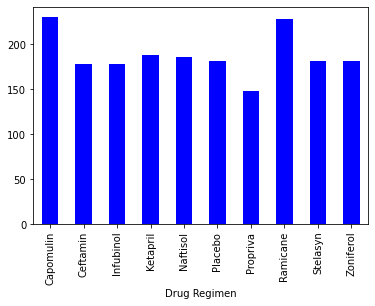

In [125]:
timepoint_chart_pyplot = timepoint_by_reg.plot(kind="bar", facecolor="blue")
plt.show()

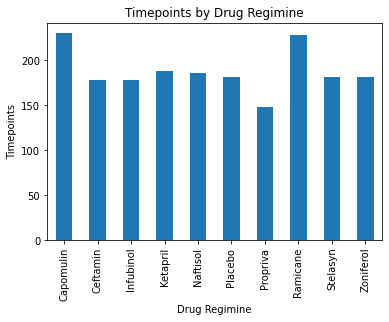

In [127]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
timepoint_chart_pandas = timepoint_by_reg.plot(kind = "bar", title="Timepoints by Drug Regimine")
timepoint_chart_pandas.set_xlabel("Drug Regimine")
timepoint_chart_pandas.set_ylabel("Timepoints")
plt.show()

In [129]:
#Get clean dataframe for pie chart
groupby_sex_df = clean_df.groupby(clean_df["Sex"])
groupby_sex_df.count().head(10)

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


In [131]:
#Get data for pie chart
groupby_sex = groupby_sex_df["Sex"].count()
groupby_sex

Sex
Female    922
Male      958
Name: Sex, dtype: int64

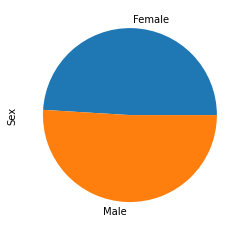

In [132]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
groupby_sex_pandas_pie = groupby_sex.plot(kind="pie", y="sex")
plt.show()

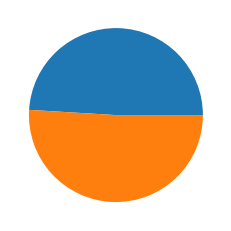

In [133]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
groupby_sex__pyplot_pie = plt.pie(groupby_sex)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [135]:
# Start by getting the last (greatest) timepoint for each mouse
#Get new dataframe
df_maxtimepoint = clean_df
df_maxtimepoint.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [136]:
#List of mice ids
list_by_mouse = df_maxtimepoint["Mouse ID"]
list_by_mouse

0       k403
1       k403
2       k403
3       k403
4       k403
        ... 
1875    z969
1876    z969
1877    z969
1878    z969
1879    z969
Name: Mouse ID, Length: 1880, dtype: object

In [137]:
#list of timepoints
list_timepoints = df_maxtimepoint["Timepoint"]
list_timepoints

0        0
1        5
2       10
3       15
4       20
        ..
1875    25
1876    30
1877    35
1878    40
1879    45
Name: Timepoint, Length: 1880, dtype: int64

In [145]:
#Get max timepoints
max_timepoints= []
for val in list_by_mouse:
    temp_df = df_maxtimepoint[df_maxtimepoint ["Mouse ID"]==val][["Mouse ID", "Timepoint"]]
    max_timepoints.append(temp_df.max())
print(max_timepoints)

[Mouse ID     k403
Timepoint      45
dtype: object, Mouse ID     k403
Timepoint      45
dtype: object, Mouse ID     k403
Timepoint      45
dtype: object, Mouse ID     k403
Timepoint      45
dtype: object, Mouse ID     k403
Timepoint      45
dtype: object, Mouse ID     k403
Timepoint      45
dtype: object, Mouse ID     k403
Timepoint      45
dtype: object, Mouse ID     k403
Timepoint      45
dtype: object, Mouse ID     k403
Timepoint      45
dtype: object, Mouse ID     k403
Timepoint      45
dtype: object, Mouse ID     s185
Timepoint      45
dtype: object, Mouse ID     s185
Timepoint      45
dtype: object, Mouse ID     s185
Timepoint      45
dtype: object, Mouse ID     s185
Timepoint      45
dtype: object, Mouse ID     s185
Timepoint      45
dtype: object, Mouse ID     s185
Timepoint      45
dtype: object, Mouse ID     s185
Timepoint      45
dtype: object, Mouse ID     s185
Timepoint      45
dtype: object, Mouse ID     s185
Timepoint      45
dtype: object, Mouse ID     s185
Timepoint   

In [151]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_timepoints = pd.DataFrame(max_timepoints)
max_timepoints.head()

,Mouse ID,Timepoint
0,k403,45
1,k403,45
2,k403,45
3,k403,45
4,k403,45


In [152]:
#Merge last timepoint df to full data df
merged_df = df_maxtimepoint.merge(max_timepoints, how="inner", on="Mouse ID")
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,0,45.000000,0,45
2,k403,Ramicane,Male,21,16,0,45.000000,0,45
3,k403,Ramicane,Male,21,16,0,45.000000,0,45
4,k403,Ramicane,Male,21,16,0,45.000000,0,45
...,...,...,...,...,...,...,...,...,...
16619,z969,Naftisol,Male,9,30,45,73.867845,4,45
16620,z969,Naftisol,Male,9,30,45,73.867845,4,45
16621,z969,Naftisol,Male,9,30,45,73.867845,4,45
16622,z969,Naftisol,Male,9,30,45,73.867845,4,45


In [157]:
#Renaming Columns
merged_df.rename(columns = {"Timepoint_y": "Max Timepoint", "Timepoint_x": "Timepoint"},            
          inplace = True) 
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,0,45.000000,0,45
2,k403,Ramicane,Male,21,16,0,45.000000,0,45
3,k403,Ramicane,Male,21,16,0,45.000000,0,45
4,k403,Ramicane,Male,21,16,0,45.000000,0,45
...,...,...,...,...,...,...,...,...,...
16619,z969,Naftisol,Male,9,30,45,73.867845,4,45
16620,z969,Naftisol,Male,9,30,45,73.867845,4,45
16621,z969,Naftisol,Male,9,30,45,73.867845,4,45
16622,z969,Naftisol,Male,9,30,45,73.867845,4,45


In [199]:
ending_vol= merged_df[(merged_df["Timepoint"] == merged_df["Max Timepoint"])]
ending_vol

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
90,k403,Ramicane,Male,21,16,45,22.050126,1,45
91,k403,Ramicane,Male,21,16,45,22.050126,1,45
92,k403,Ramicane,Male,21,16,45,22.050126,1,45
93,k403,Ramicane,Male,21,16,45,22.050126,1,45
94,k403,Ramicane,Male,21,16,45,22.050126,1,45
...,...,...,...,...,...,...,...,...,...
16619,z969,Naftisol,Male,9,30,45,73.867845,4,45
16620,z969,Naftisol,Male,9,30,45,73.867845,4,45
16621,z969,Naftisol,Male,9,30,45,73.867845,4,45
16622,z969,Naftisol,Male,9,30,45,73.867845,4,45


In [221]:
#List for final volume
unique_dataset = ending_vol.drop_duplicates()
unique_dataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
90,k403,Ramicane,Male,21,16,45,22.050126,1,45
190,s185,Capomulin,Female,3,17,45,23.343598,1,45
290,x401,Capomulin,Female,16,15,45,28.484033,0,45
390,m601,Capomulin,Male,22,17,45,28.430964,1,45
490,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
16313,z314,Stelasyn,Female,21,28,5,45.934712,0,5
16321,z435,Propriva,Female,12,26,10,48.710661,0,10
16414,z581,Infubinol,Female,24,25,45,62.754451,3,45
16514,z795,Naftisol,Female,13,29,45,65.741070,3,45


In [223]:
ending_vol_values = unique_dataset
ending_vol_values

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
90,k403,Ramicane,Male,21,16,45,22.050126,1,45
190,s185,Capomulin,Female,3,17,45,23.343598,1,45
290,x401,Capomulin,Female,16,15,45,28.484033,0,45
390,m601,Capomulin,Male,22,17,45,28.430964,1,45
490,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
16313,z314,Stelasyn,Female,21,28,5,45.934712,0,5
16321,z435,Propriva,Female,12,26,10,48.710661,0,10
16414,z581,Infubinol,Female,24,25,45,62.754451,3,45
16514,z795,Naftisol,Female,13,29,45,65.741070,3,45


In [269]:
#List of mice ids
mouse_ids_final_vol = ending_vol_values["Mouse ID"]
mouse_ids_final_vol

90       k403
190      s185
290      x401
390      m601
490      g791
         ... 
16313    z314
16321    z435
16414    z581
16514    z795
16614    z969
Name: Mouse ID, Length: 248, dtype: object

In [224]:
# Put treatments into a list for for loop (and later for plot labels)
top_4_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
top_4_regimens

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [301]:
top_4_ending_vol = ending_vol_values[ending_vol_values["Drug Regimen"].isin(top_4_regimens)]
top_4_ending_vol

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
90,k403,Ramicane,Male,21,16,45,22.050126,1,45
190,s185,Capomulin,Female,3,17,45,23.343598,1,45
290,x401,Capomulin,Female,16,15,45,28.484033,0,45
390,m601,Capomulin,Male,22,17,45,28.430964,1,45
490,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
15757,x822,Ceftamin,Male,3,29,45,61.386660,3,45
15893,y163,Infubinol,Female,17,27,45,67.685569,3,45
16197,y769,Ceftamin,Female,6,27,45,68.594745,4,45
16297,y865,Ceftamin,Male,23,26,45,64.729837,3,45


In [323]:
#Get Volume values
vol_values = top_4_ending_vol["Tumor Volume (mm3)"]
vol_values_array = vol_values.unique()
print(top_4_ending_vol["Tumor Volume (mm3)"])

90       22.050126
190      23.343598
290      28.484033
390      28.430964
490      29.128472
           ...    
15757    61.386660
15893    67.685569
16197    68.594745
16297    64.729837
16414    62.754451
Name: Tumor Volume (mm3), Length: 100, dtype: float64


In [325]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = top_4_ending_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final volume is: {lowerq}")
print(f"The upper quartile of the final volume is: {upperq}")
print(f"The interquartile range of the final volume is: {iqr}")
print(f"The the median of the final volume is: {quartiles[0.5]} ")

The lower quartile of final volume is: 37.187743802499995
The upper quartile of the final volume is: 59.930261755000004
The interquartile range of the final volume is: 22.74251795250001
The the median of the final volume is: 45.0 


In [326]:
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


In [316]:
#Get Volume values
vol_values = top_4_ending_vol["Tumor Volume (mm3)"]
print(vol_values_array = vol_values.unique()

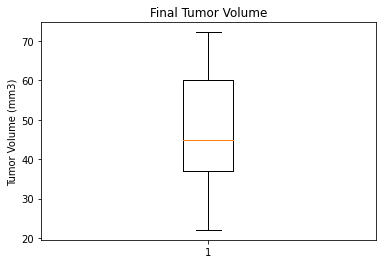

In [328]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(vol_values_array)
plt.show()

In [319]:
# vol_values_array.sort()
# print(vol_values_array)

[22.05012627 23.34359787 28.43096411 28.48403281 29.12847181 30.27623175
 30.48598484 30.56462509 30.63869575 31.02392294 31.09533505 31.56046955
 31.8962384  32.37735684 32.97852192 33.32909778 33.39765251 33.56240217
 34.45529799 36.04104736 36.13485243 36.3213458  36.37451039 36.56165229
 37.07402422 37.22565033 37.31123552 37.31184577 38.1251644  38.34200823
 38.4076183  38.75326548 38.81036633 38.84687569 38.93963263 38.98287774
 39.95234669 40.1592203  40.65812366 40.65900627 40.66771292 40.72857787
 41.48300765 41.58152074 43.0475426  43.16637266 43.41938077 44.18345092
 45.         45.22086888 45.69933088 46.25011212 46.53920617 46.78453491
 47.01036401 47.68596303 47.7846818  48.72207785 50.00513807 51.54243058
 52.92534846 54.04860769 54.65654872 55.62942846 55.65068132 55.74282869
 56.05774909 57.03186187 57.91838132 58.26844248 59.74190064 59.85195552
 60.16518046 60.91876652 60.96971133 61.38666032 61.43389223 61.84902336
 62.11727887 62.43540402 62.75445141 62.99935619 64

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
